# Create a larger Foot Traffic Data Set 

Based off the XPlore logic, this time load in more more foot traffic data based on the full history downloaded and saved to /data_files_raw/foot_traffic_melb/ folder

In [46]:
import pandas as pd
from datetime import datetime
from dateutil.relativedelta import relativedelta
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import re

from utilities import data_basic_utility as databasic
from utilities import regex_utility as reutil

# File Variables

Set the start and end date of the time frame of data to load in and combine into one unified file

In [47]:
filesEndDate = datetime(2022, 7, 1)
#filesStartDate = datetime(2022, 4, 1)
filesStartDate = datetime(2013, 1, 1)

footTrafficFolder = "./data_files_raw/foot_traffic_melb/"
tempFolder = "./tmp/"

    

Load all the weather data files like rain and temp

In [48]:
rain = pd.read_csv("IDCJAC0009_086338_1800_Data.csv")
max_temp = pd.read_csv("IDCJAC0010_086338_1800_Data.csv")
min_temp = pd.read_csv("IDCJAC0011_086338_1800_Data.csv")
solar_exp = pd.read_csv("IDCJAC0016_086338_1800_Data.csv")

In [49]:
# Helper functions for data files
def make_date_col(df):
    df["date"] = df['Day'].astype(str) + "/" + df['Month'].astype(str) + "/" + df['Year'].astype(str)
    df["date"] = pd.to_datetime(df["date"], format="%d/%m/%Y")
    return df['date']

    
def filter_weathers(df, startDate='2022-07-01', endDate='2022-07-31'):
    df = df.loc[(df['date'] >= startDate) & (df['date'] <= endDate)]
    return df    

## Rain clean

In [50]:
print(rain.info())
rain.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3523 entries, 0 to 3522
Data columns (total 8 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Product code                                    3523 non-null   object 
 1   Bureau of Meteorology station number            3523 non-null   int64  
 2   Year                                            3523 non-null   int64  
 3   Month                                           3523 non-null   int64  
 4   Day                                             3523 non-null   int64  
 5   Rainfall amount (millimetres)                   3366 non-null   float64
 6   Period over which rainfall was measured (days)  3365 non-null   float64
 7   Quality                                         3366 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 220.3+ KB
None


,Product code,Bureau of Meteorology station number,Year,Month,Day,Rainfall amount (millimetres),Period over which rainfall was measured (days),Quality
0,IDCJAC0009,86338,2013,1,1,NaN,NaN,NaN
1,IDCJAC0009,86338,2013,1,2,NaN,NaN,NaN
2,IDCJAC0009,86338,2013,1,3,NaN,NaN,NaN
3,IDCJAC0009,86338,2013,1,4,NaN,NaN,NaN
4,IDCJAC0009,86338,2013,1,5,NaN,NaN,NaN
5,IDCJAC0009,86338,2013,1,6,NaN,NaN,NaN
6,IDCJAC0009,86338,2013,1,7,NaN,NaN,NaN
7,IDCJAC0009,86338,2013,1,8,NaN,NaN,NaN
8,IDCJAC0009,86338,2013,1,9,NaN,NaN,NaN
9,IDCJAC0009,86338,2013,1,10,NaN,NaN,NaN


In [51]:
rain = rain.drop(labels=['Product code', 'Bureau of Meteorology station number'], axis=1)

In [52]:
rain["date"] = make_date_col(rain)

In [53]:
rain.head(10)

,Year,Month,Day,Rainfall amount (millimetres),Period over which rainfall was measured (days),Quality,date
0,2013,1,1,NaN,NaN,NaN,2013-01-01
1,2013,1,2,NaN,NaN,NaN,2013-01-02
2,2013,1,3,NaN,NaN,NaN,2013-01-03
3,2013,1,4,NaN,NaN,NaN,2013-01-04
4,2013,1,5,NaN,NaN,NaN,2013-01-05
5,2013,1,6,NaN,NaN,NaN,2013-01-06
6,2013,1,7,NaN,NaN,NaN,2013-01-07
7,2013,1,8,NaN,NaN,NaN,2013-01-08
8,2013,1,9,NaN,NaN,NaN,2013-01-09
9,2013,1,10,NaN,NaN,NaN,2013-01-10


In [54]:
rain.rename(columns={'Rainfall amount (millimetres)':"total_rain"},inplace=True)

In [55]:
rain.head()

,Year,Month,Day,total_rain,Period over which rainfall was measured (days),Quality,date
0,2013,1,1,NaN,NaN,NaN,2013-01-01
1,2013,1,2,NaN,NaN,NaN,2013-01-02
2,2013,1,3,NaN,NaN,NaN,2013-01-03
3,2013,1,4,NaN,NaN,NaN,2013-01-04
4,2013,1,5,NaN,NaN,NaN,2013-01-05


In [56]:
rain.sort_index(ascending=False).head()

,Year,Month,Day,total_rain,Period over which rainfall was measured (days),Quality,date
3522,2022,8,24,0.4,1.0,N,2022-08-24
3521,2022,8,23,8.8,1.0,N,2022-08-23
3520,2022,8,22,0.0,1.0,N,2022-08-22
3519,2022,8,21,0.0,1.0,N,2022-08-21
3518,2022,8,20,4.4,1.0,N,2022-08-20


## Foot traffic clean

In [57]:
# Have a look at one of the files
foot_traffic = pd.read_csv("July_2022.csv")

print(foot_traffic.info())
foot_traffic.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 83 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   Date                                              744 non-null    object
 1   Hour                                              744 non-null    int64 
 2   Bourke Street Mall (North)                        744 non-null    object
 3   Bourke Street Mall (South)                        744 non-null    object
 4   Melbourne Central                                 744 non-null    object
 5   Town Hall (West)                                  744 non-null    int64 
 6   Princes Bridge                                    744 non-null    int64 
 7   Flinders Street Station Underpass                 744 non-null    int64 
 8   Birrarung Marr                                    744 non-null    object
 9   Webb Bridge                     

,Date,Hour,Bourke Street Mall (North),Bourke Street Mall (South),Melbourne Central,Town Hall (West),Princes Bridge,Flinders Street Station Underpass,Birrarung Marr,Webb Bridge,...,Bourke St - Spencer St (South),Spring St- Flinders St (West),Macaulay Rd-Bellair St,Harbour Esplanade (West) - Pedestrian Path,Harbour Esplanade (West) - Bike Path,Flinders St (South),Elizabeth St - Flinders St (East) - New footpath,Macaulay Rd (North),Queensberry St - Errol St (South),Errol St (West)
0,1/07/2022,0,26,50,243,104,76,125,na,8,...,na,1,na,na,10,79,156,4,2,6
1,1/07/2022,1,17,55,157,56,58,75,na,10,...,na,na,na,na,16,39,105,na,2,2
2,1/07/2022,2,13,18,118,42,39,21,1,na,...,na,1,na,1,na,35,93,na,na,na
3,1/07/2022,3,8,23,111,23,37,23,na,3,...,na,na,2,1,1,19,62,na,1,1
4,1/07/2022,4,10,10,101,18,34,32,na,na,...,na,3,na,na,1,9,65,na,na,2
5,1/07/2022,5,7,20,70,33,74,110,na,14,...,na,19,na,na,na,66,59,3,5,6
6,1/07/2022,6,25,44,110,95,162,376,na,39,...,na,80,4,4,3,130,215,27,19,20
7,1/07/2022,7,116,99,178,277,314,631,na,140,...,na,54,34,78,17,221,524,62,37,68
8,1/07/2022,8,339,271,382,717,629,1484,1,246,...,na,68,87,213,44,544,1093,117,65,122
9,1/07/2022,9,619,494,518,952,602,942,1,185,...,na,72,112,178,58,485,1016,133,87,159


In [58]:
# This is basically Freddie's logic of loading in one month's file, cleaning it and converting it to a total people count
def loadAndCountFootTrafficFile(dataFile):
    foot_traffic = pd.read_csv(footTrafficFolder + dataFile)
    foot_traffic=foot_traffic.replace(to_replace=["na","undefined"],value=0)
    # foot_traffic["total_people"] = foot_traffic.iloc[:,2:].sum(axis=1)

    # Rather than using column position, use the columns names, just in case older files have a different structure
    colsToCount = foot_traffic.columns
    colsToCount = colsToCount.drop([ "Date", "Hour" ])
    # print(colsToCount)
    foot_traffic["total_people"] = foot_traffic[colsToCount].sum(axis=1)

    # get the first date to test the structure
    firstDate = foot_traffic["Date"][0]
    if reutil.re_is_match(reutil.regex_DateDdMmYyyy(), firstDate):
        foot_traffic["Date"] = pd.to_datetime(foot_traffic["Date"], format="%d/%m/%Y")
    elif reutil.re_is_match(reutil.regex_DateDdMmYy(), firstDate):
        foot_traffic["Date"] = pd.to_datetime(foot_traffic["Date"], format="%d/%m/%y")
    elif reutil.re_is_match(reutil.regex_DateDdMmmYy(), firstDate):
        foot_traffic["Date"] = pd.to_datetime(foot_traffic["Date"], format="%d-%b-%y")    


    foot_traffic = foot_traffic.groupby("Date").sum().reset_index()
    foot_traffic.rename(columns={'Date':'date'}, inplace=True)
    foot_traffic = foot_traffic[["date", "total_people"]]
    return foot_traffic



In [59]:
# Test the function
dfFT_202207 = loadAndCountFootTrafficFile("July_2022.csv")

print(dfFT_202207.info())
dfFT_202207.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          31 non-null     datetime64[ns]
 1   total_people  31 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 624.0 bytes
None


,date,total_people
0,2022-07-01,435062
1,2022-07-02,501883
2,2022-07-03,386038
3,2022-07-04,356396
4,2022-07-05,370637
5,2022-07-06,423220
6,2022-07-07,390030
7,2022-07-08,379723
8,2022-07-09,458521
9,2022-07-10,372983


In [60]:
# First, start with the end month, load the data into a dataframe
fileName = filesEndDate.strftime("%B") + "_" + filesEndDate.strftime("%Y") + ".csv"
print(fileName)

dfFootTraffic = loadAndCountFootTrafficFile(fileName)
print(dfFootTraffic.info())
dfFootTraffic.head()

July_2022.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          31 non-null     datetime64[ns]
 1   total_people  31 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 624.0 bytes
None


,date,total_people
0,2022-07-01,435062
1,2022-07-02,501883
2,2022-07-03,386038
3,2022-07-04,356396
4,2022-07-05,370637


In [61]:
date1 = '1-Nov-13'
date2 = "23/5/21"

pattern = reutil.regex_DateDdMmmYy()
if re.match(pattern, date1):
    print("date1 regex_DateDdMmmYy MATCH")
else:
    print("date1 regex_DateDdMmmYy NO MATCH")


pattern = reutil.regex_DateDdMmmYy()
if re.match(pattern, date2):
    print("date2 regex_DateDdMmmYy MATCH")
else:
    print("date2 regex_DateDdMmmYy NO MATCH")

pattern = reutil.regex_DateDdMmYy()
if re.match(pattern, date2):
    print("date2 regex_DateDdMmmYy MATCH")
else:
    print("date2 regex_DateDdMmmYy NO MATCH")    

date1 regex_DateDdMmmYy MATCH
date2 regex_DateDdMmmYy NO MATCH
date2 regex_DateDdMmmYy MATCH


In [62]:
# Now go back to the month before
stepperDate = filesEndDate
stepperDate = stepperDate - relativedelta(months=1)
stepCount = 0

# For each month, load the data, append it to the total dataframe then step back another month
# keep going until we get all the way to the start date
while stepperDate >= filesStartDate:
    fileName = stepperDate.strftime("%B") + "_" + stepperDate.strftime("%Y") + ".csv"
    # print(fileName)

    dfMonth = loadAndCountFootTrafficFile(fileName)
    dfFootTraffic = pd.concat([dfFootTraffic, dfMonth])

    # step back
    stepperDate = stepperDate - relativedelta(months=1)

    # Sanity check, break in case of an infinite loop
    stepCount += 1
    if stepCount > 1000:
        break


# Order by the date desc
dfFootTraffic = dfFootTraffic.sort_values(["date"], ascending=False)

print(dfFootTraffic.info())
dfFootTraffic.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3499 entries, 30 to 0
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          3499 non-null   datetime64[ns]
 1   total_people  3499 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 82.0 KB
None


,date,total_people
30,2022-07-31,327383.0
29,2022-07-30,462115.0
28,2022-07-29,405511.0
27,2022-07-28,334858.0
26,2022-07-27,340569.0


In [63]:
dfFootTraffic.sort_values(["date"], ascending=True).head()

# dfFootTraffic.to_csv(tempFolder + "foottraffic.csv")

,date,total_people
0,2013-01-01,212486.0
1,2013-01-02,244083.0
2,2013-01-03,226005.0
3,2013-01-04,192351.0
4,2013-01-05,195376.0


# Join and plot 

In [64]:
df= rain.loc[:,["date","total_rain"]].merge(dfFootTraffic.loc[:,['date','total_people']], on = "date")

Text(0, 0.5, 'Foot traffic')

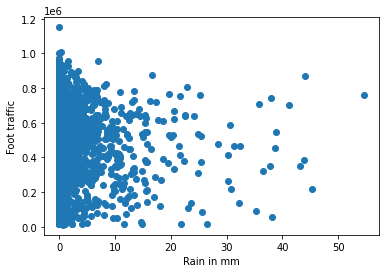

In [65]:
plt.scatter(df["total_rain"],df["total_people"])
plt.xlabel("Rain in mm")
plt.ylabel("Foot traffic")

#### Max temp clean

In [66]:
# max_temp= pd.read_csv("IDCJAC0010_086338_2022_Data.csv")
# min_temp= pd.read_csv("IDCJAC0011_086338_2022_Data.csv")

# NC: updated to use the all years data for max and min temp

In [67]:
max_temp['date'] = make_date_col(max_temp)
min_temp['date'] = make_date_col(min_temp)
solar_exp['date'] = make_date_col(solar_exp)

In [68]:
# Get out the range of dates that have been loaded from the foot traffic and filter the weather data accordingly
ftMinDate = dfFootTraffic["date"].min()
ftMaxDate = dfFootTraffic["date"].max()

print(ftMinDate)
print(ftMaxDate)

max_temp=filter_weathers(max_temp, ftMinDate, ftMaxDate)
min_temp=filter_weathers(min_temp, ftMinDate, ftMaxDate)
solar_exp=filter_weathers(solar_exp, ftMinDate, ftMaxDate)

2013-01-01 00:00:00
2022-07-31 00:00:00


In [69]:
max_temp.rename(columns={"Maximum temperature (Degree C)":"max_temp"},inplace=True)

In [70]:
min_temp.rename(columns={"Minimum temperature (Degree C)":"min_temp"},inplace=True)

In [71]:
solar_exp.rename(columns={"Daily global solar exposure (MJ/m*m)":"solar_exp"},inplace=True)

In [72]:
print(max_temp.info())
max_temp.head()


# max_temp.to_csv(tempFolder + "maxtemp.csv")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3499 entries, 0 to 3498
Data columns (total 9 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   Product code                                 3499 non-null   object        
 1   Bureau of Meteorology station number         3499 non-null   int64         
 2   Year                                         3499 non-null   int64         
 3   Month                                        3499 non-null   int64         
 4   Day                                          3499 non-null   int64         
 5   max_temp                                     3347 non-null   float64       
 6   Days of accumulation of maximum temperature  3347 non-null   float64       
 7   Quality                                      3346 non-null   object        
 8   date                                         3499 non-null   datetime64[ns]
dty

,Product code,Bureau of Meteorology station number,Year,Month,Day,max_temp,Days of accumulation of maximum temperature,Quality,date
0,IDCJAC0010,86338,2013,1,1,NaN,NaN,NaN,2013-01-01
1,IDCJAC0010,86338,2013,1,2,NaN,NaN,NaN,2013-01-02
2,IDCJAC0010,86338,2013,1,3,NaN,NaN,NaN,2013-01-03
3,IDCJAC0010,86338,2013,1,4,NaN,NaN,NaN,2013-01-04
4,IDCJAC0010,86338,2013,1,5,NaN,NaN,NaN,2013-01-05


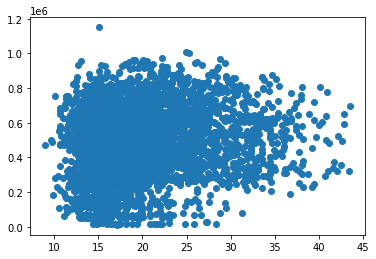

In [73]:
plt.scatter(max_temp["max_temp"],df["total_people"])


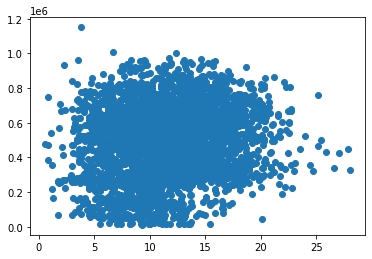

In [74]:
plt.scatter(min_temp["min_temp"],df["total_people"])

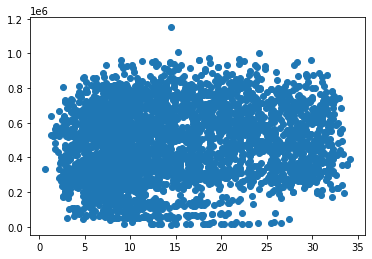

In [75]:
plt.scatter(solar_exp["solar_exp"],df["total_people"])

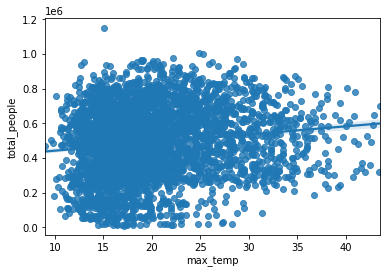

In [76]:
sns.regplot(x=max_temp["max_temp"], y=df["total_people"]);

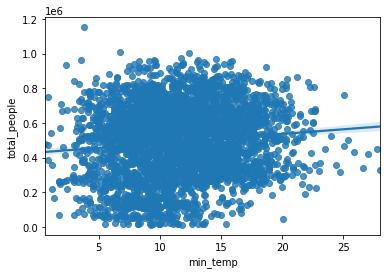

In [77]:
sns.regplot(x=min_temp["min_temp"], y=df["total_people"]);

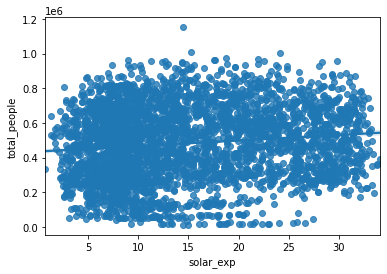

In [78]:
sns.regplot(x=solar_exp["solar_exp"], y=df["total_people"]);

Write out a datafile with the date and the total foot traffic numbers in Melbourne, for future use

Also, create a datafile with the foot traffic and all the weather columns by day for Melbourne, we can use that later as a source datafile for basic modelling

In [79]:
# Foot Traffic by day Data
outputFootTrafficFileName = "FootTrafficMelb_" + filesStartDate.strftime("%Y%m%d") + "_" + filesEndDate.strftime("%Y%m%d") + ".csv"
dfFootTraffic.to_csv("./data_files/" + outputFootTrafficFileName, index=False)

print(dfFootTraffic.info())
dfFootTraffic.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3499 entries, 30 to 0
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          3499 non-null   datetime64[ns]
 1   total_people  3499 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 82.0 KB
None


,date,total_people
30,2022-07-31,327383.0
29,2022-07-30,462115.0
28,2022-07-29,405511.0
27,2022-07-28,334858.0
26,2022-07-27,340569.0


In [80]:
rain.head()

,Year,Month,Day,total_rain,Period over which rainfall was measured (days),Quality,date
0,2013,1,1,NaN,NaN,NaN,2013-01-01
1,2013,1,2,NaN,NaN,NaN,2013-01-02
2,2013,1,3,NaN,NaN,NaN,2013-01-03
3,2013,1,4,NaN,NaN,NaN,2013-01-04
4,2013,1,5,NaN,NaN,NaN,2013-01-05


The data we want is total rain, and also Quality, which is a Y/N and shows whether the rain measurement has passed full quality control. If N, then the measurement might be suspect

In [81]:
dfRainToMerge = rain[["total_rain", "Quality", "date"]]
dfRainToMerge.rename(columns={"Quality":"rain_quality"},inplace=True)

dfFootTrafficWeather = pd.merge(dfFootTraffic, dfRainToMerge, how="inner", on="date")
dfFootTrafficWeather.head()

c:\Users\nelso\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,date,total_people,total_rain,rain_quality
0,2022-07-31,327383.0,0.0,N
1,2022-07-30,462115.0,0.0,N
2,2022-07-29,405511.0,1.0,N
3,2022-07-28,334858.0,1.0,N
4,2022-07-27,340569.0,3.0,N


In [82]:
# Merge the Max Temp
dfMaxTempToMerge = max_temp[["max_temp", "Quality", "date"]]
dfMaxTempToMerge.rename(columns={"Quality":"max_temp_quality"},inplace=True)
dfFootTrafficWeather = pd.merge(dfFootTrafficWeather, dfMaxTempToMerge, how="inner", on="date")

# Merge the Max Temp
dfMinTempToMerge = min_temp[["min_temp", "Quality", "date"]]
dfMinTempToMerge.rename(columns={"Quality":"min_temp_quality"},inplace=True)
dfFootTrafficWeather = pd.merge(dfFootTrafficWeather, dfMinTempToMerge, how="inner", on="date")

dfFootTrafficWeather.head()

c:\Users\nelso\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,date,total_people,total_rain,rain_quality,max_temp,max_temp_quality,min_temp,min_temp_quality
0,2022-07-31,327383.0,0.0,N,14.7,Y,4.3,Y
1,2022-07-30,462115.0,0.0,N,13.0,Y,2.1,Y
2,2022-07-29,405511.0,1.0,N,12.7,Y,6.5,Y
3,2022-07-28,334858.0,1.0,N,13.2,Y,9.3,Y
4,2022-07-27,340569.0,3.0,N,15.3,Y,9.3,Y


In [83]:
solar_exp.head()

,Product code,Bureau of Meteorology station number,Year,Month,Day,solar_exp,date
8401,IDCJAC0016,86338,2013,1,1,31.1,2013-01-01
8402,IDCJAC0016,86338,2013,1,2,31.9,2013-01-02
8403,IDCJAC0016,86338,2013,1,3,32.8,2013-01-03
8404,IDCJAC0016,86338,2013,1,4,33.5,2013-01-04
8405,IDCJAC0016,86338,2013,1,5,30.5,2013-01-05


In [84]:
# Merge the Solar Exposure
dfSolarExpToMerge = solar_exp[["solar_exp", "date"]]
dfFootTrafficWeather = pd.merge(dfFootTrafficWeather, dfSolarExpToMerge, how="inner", on="date")

print(dfFootTrafficWeather.info())
dfFootTrafficWeather.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3499 entries, 0 to 3498
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              3499 non-null   datetime64[ns]
 1   total_people      3499 non-null   float64       
 2   total_rain        3342 non-null   float64       
 3   rain_quality      3342 non-null   object        
 4   max_temp          3347 non-null   float64       
 5   max_temp_quality  3346 non-null   object        
 6   min_temp          3346 non-null   float64       
 7   min_temp_quality  3346 non-null   object        
 8   solar_exp         3498 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 273.4+ KB
None


,date,total_people,total_rain,rain_quality,max_temp,max_temp_quality,min_temp,min_temp_quality,solar_exp
0,2022-07-31,327383.0,0.0,N,14.7,Y,4.3,Y,4.8
1,2022-07-30,462115.0,0.0,N,13.0,Y,2.1,Y,11.3
2,2022-07-29,405511.0,1.0,N,12.7,Y,6.5,Y,11.2
3,2022-07-28,334858.0,1.0,N,13.2,Y,9.3,Y,9.3
4,2022-07-27,340569.0,3.0,N,15.3,Y,9.3,Y,7.7


Add the day of the week as a feature

In [85]:
dfFootTrafficWeather["WeekDay"] = dfFootTrafficWeather.apply(lambda x: x["date"].weekday(), axis=1)

Adding annual population and growth rating to the data

In [86]:
# First, create a temp dateyear column for joining
dfFootTrafficWeather["date_year"] = dfFootTrafficWeather.apply(lambda x: x["date"].year, axis=1)

In [87]:
dfFootTrafficWeather.head()

,date,total_people,total_rain,rain_quality,max_temp,max_temp_quality,min_temp,min_temp_quality,solar_exp,WeekDay,date_year
0,2022-07-31,327383.0,0.0,N,14.7,Y,4.3,Y,4.8,6,2022
1,2022-07-30,462115.0,0.0,N,13.0,Y,2.1,Y,11.3,5,2022
2,2022-07-29,405511.0,1.0,N,12.7,Y,6.5,Y,11.2,4,2022
3,2022-07-28,334858.0,1.0,N,13.2,Y,9.3,Y,9.3,3,2022
4,2022-07-27,340569.0,3.0,N,15.3,Y,9.3,Y,7.7,2,2022


In [88]:
# Load the population file
dfPop = pd.read_csv("./data_files/greatermelb_population_annual.csv")
print(dfPop.shape)
print(dfPop.info())
dfPop.head()

(10, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            10 non-null     object 
 1    Population     10 non-null     int64  
 2    Annual Change  10 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 368.0+ bytes
None


,date,Population,Annual Change
0,31/12/2013,4217000,2.50
1,31/12/2014,4322000,2.49
2,31/12/2015,4430000,2.50
3,31/12/2016,4541000,2.51
4,31/12/2017,4654000,2.49


In [89]:
# Convert to just a date year column
dfPop["date_year"] = dfPop.apply(lambda x: pd.to_datetime(x["date"]).year, axis=1)
dfPop = dfPop.rename(columns={ " Population" : "population_annual", " Annual Change" : "population_change_annual" })
del dfPop["date"]
dfPop.head()

,population_annual,population_change_annual,date_year
0,4217000,2.50,2013
1,4322000,2.49,2014
2,4430000,2.50,2015
3,4541000,2.51,2016
4,4654000,2.49,2017


In [90]:
dfFootTrafficWeather = pd.merge(dfFootTrafficWeather, dfPop, on="date_year")
del dfFootTrafficWeather["date_year"]
print(dfFootTrafficWeather.info())
dfFootTrafficWeather.head(20)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3499 entries, 0 to 3498
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      3499 non-null   datetime64[ns]
 1   total_people              3499 non-null   float64       
 2   total_rain                3342 non-null   float64       
 3   rain_quality              3342 non-null   object        
 4   max_temp                  3347 non-null   float64       
 5   max_temp_quality          3346 non-null   object        
 6   min_temp                  3346 non-null   float64       
 7   min_temp_quality          3346 non-null   object        
 8   solar_exp                 3498 non-null   float64       
 9   WeekDay                   3499 non-null   int64         
 10  population_annual         3499 non-null   int64         
 11  population_change_annual  3499 non-null   float64       
dtypes: datetime64[ns](1)

,date,total_people,total_rain,rain_quality,max_temp,max_temp_quality,min_temp,min_temp_quality,solar_exp,WeekDay,population_annual,population_change_annual
0,2022-07-31,327383.0,0.0,N,14.7,Y,4.3,Y,4.8,6,5151000,1.78
1,2022-07-30,462115.0,0.0,N,13.0,Y,2.1,Y,11.3,5,5151000,1.78
2,2022-07-29,405511.0,1.0,N,12.7,Y,6.5,Y,11.2,4,5151000,1.78
3,2022-07-28,334858.0,1.0,N,13.2,Y,9.3,Y,9.3,3,5151000,1.78
4,2022-07-27,340569.0,3.0,N,15.3,Y,9.3,Y,7.7,2,5151000,1.78
5,2022-07-26,316316.0,4.4,N,13.2,Y,8.8,Y,6.4,1,5151000,1.78
6,2022-07-25,274106.0,0.0,N,16.8,Y,8.1,Y,5.1,0,5151000,1.78
7,2022-07-24,406977.0,7.8,N,19.3,Y,10.4,Y,10.1,6,5151000,1.78
8,2022-07-23,371336.0,1.2,N,14.5,Y,8.1,Y,5.1,5,5151000,1.78
9,2022-07-22,416838.0,0.0,N,19.0,Y,3.4,Y,9.9,4,5151000,1.78


Write out all the joined data to file

In [92]:
outputFootTrafficWeatherFileName = "FootTrafficWeatherMelb2_" + filesStartDate.strftime("%Y%m%d") + "_" + filesEndDate.strftime("%Y%m%d") + ".csv"
dfFootTrafficWeather.to_csv("./data_files/" + outputFootTrafficWeatherFileName, index=False)